In [5]:
import scvelo as scv
import scanpy as sc
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [6]:
adata = scv.read('/media/chang/HDD-2/chang2/avm_ec.h5ad')

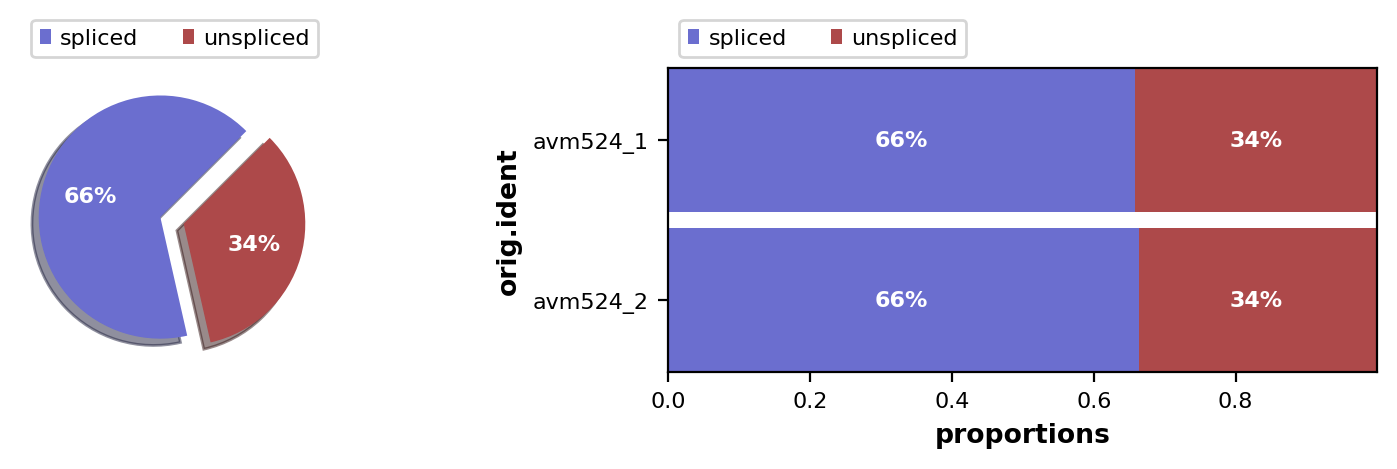

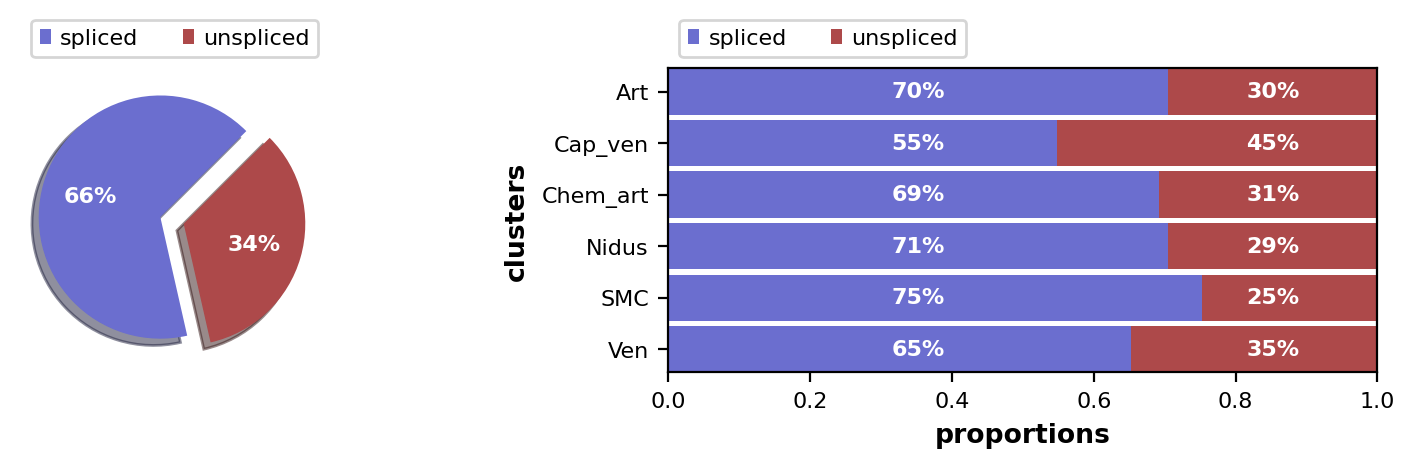

In [7]:
scv.pl.proportions(adata, groupby='orig.ident')
adata.obs['clusters'] = adata.obs['clusters2'].astype('category')
scv.pl.proportions(adata, groupby='clusters')

In [8]:
scv.pp.filter_and_normalize(adata, min_shared_counts=5, n_top_genes=3000, enforce=True)

Filtered out 49391 genes that are detected 5 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 3000 highly variable genes.
Logarithmized X.


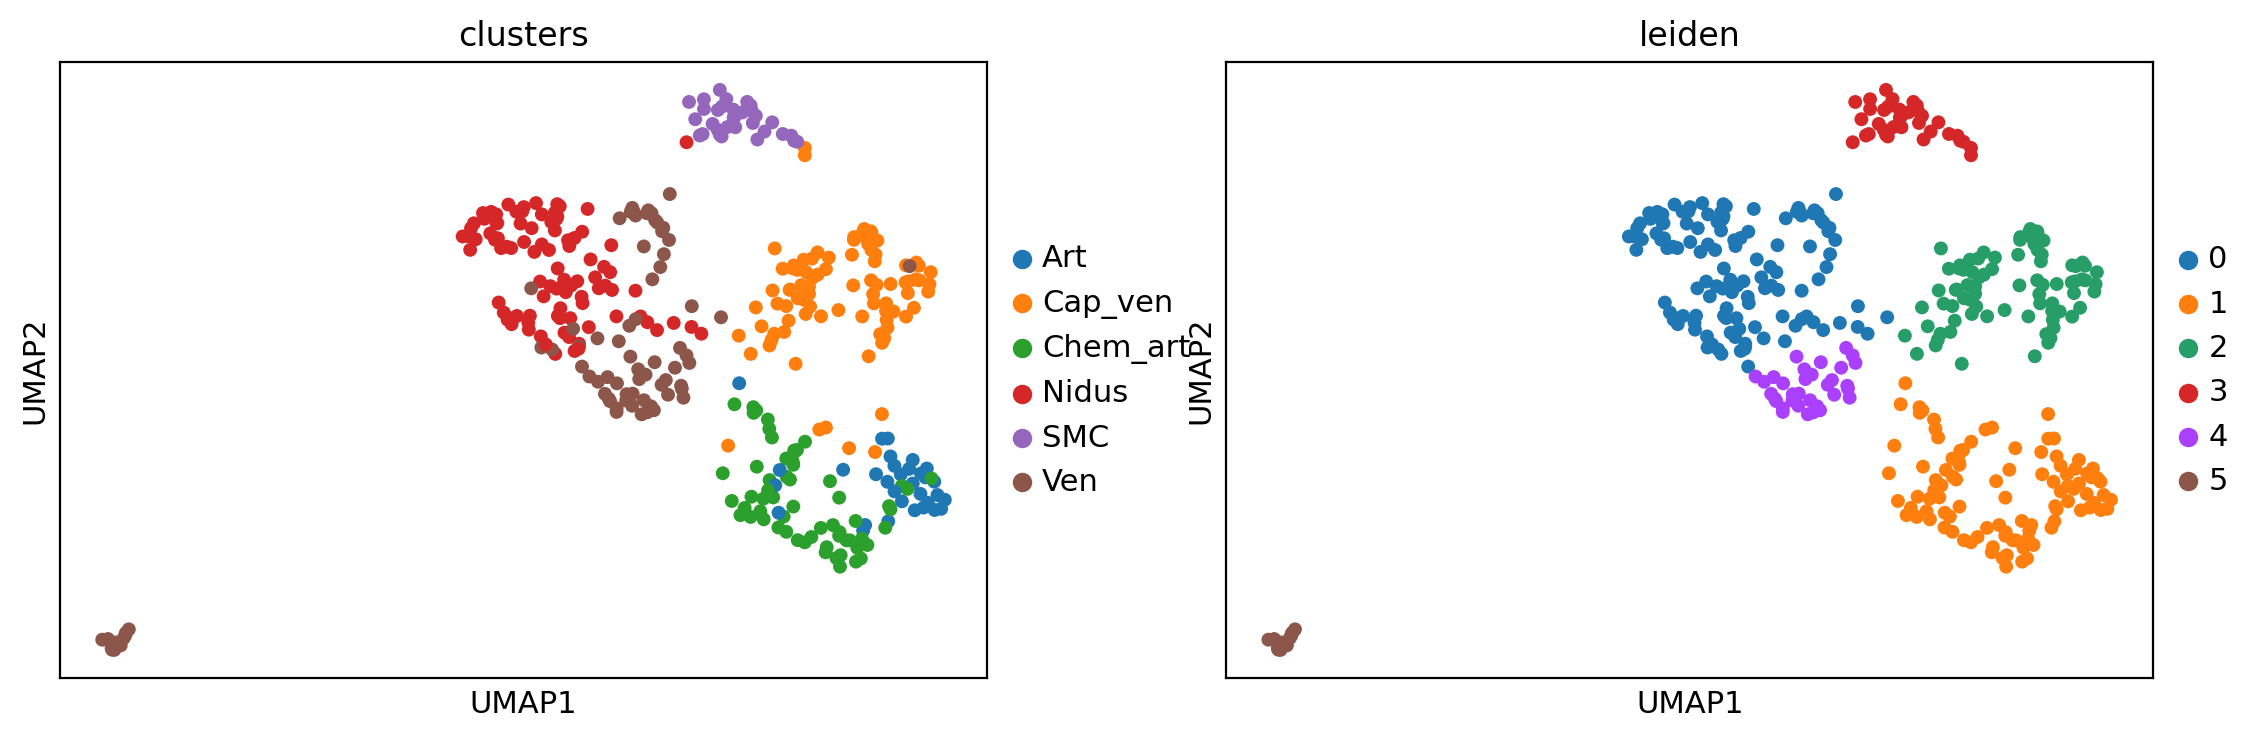

In [40]:
#sc.tl.pca(adata, svd_solver='arpack', n_comps=20)
#sc.pl.pca_variance_ratio(adata, log=True,  n_pcs=20)
#sc.pp.neighbors(adata, n_neighbors=15, n_pcs=20)
sc.tl.umap(adata, min_dist=.3)
#scv.pp.moments(adata, n_pcs=20, n_neighbors=15)
sc.tl.leiden(adata, resolution=.4)
sc.pl.umap(adata, color=['clusters','leiden'], size=100)

In [9]:
#adata_new = adata[adata.obs['leiden'].isin(['0','1','2','4']),:]
#sc.pp.neighbors(adata_new, n_neighbors=15, n_pcs=20)
#scv.pp.moments(adata_new, n_pcs=20, n_neighbors=15)
sc.tl.umap(adata_new, min_dist=.8)
#sc.tl.leiden(adata_new, resolution=.2)
sc.pl.umap(adata_new, color=['clusters','leiden'], size=100)

NameError: name 'adata_new' is not defined

In [88]:
import pandas as pd
pd.DataFrame(adata_new.obsm['X_umap']).to_csv('/media/chang/HDD-2/chang/avm_velo_umap.csv', index=False)
pd.DataFrame(adata_new.obs['leiden']).to_csv('/media/chang/HDD-2/chang/avm_velo_leiden.csv', index=False)
pd.DataFrame(adata_new.obs_names).to_csv('/media/chang/HDD-2/chang/avm_velo_cells.csv', index=False)

In [113]:
scv.tl.recover_dynamics(adata_new)
scv.tl.velocity(adata_new, mode='dynamical')
scv.tl.velocity_graph(adata_new)

recovering dynamics
    finished (0:01:35) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


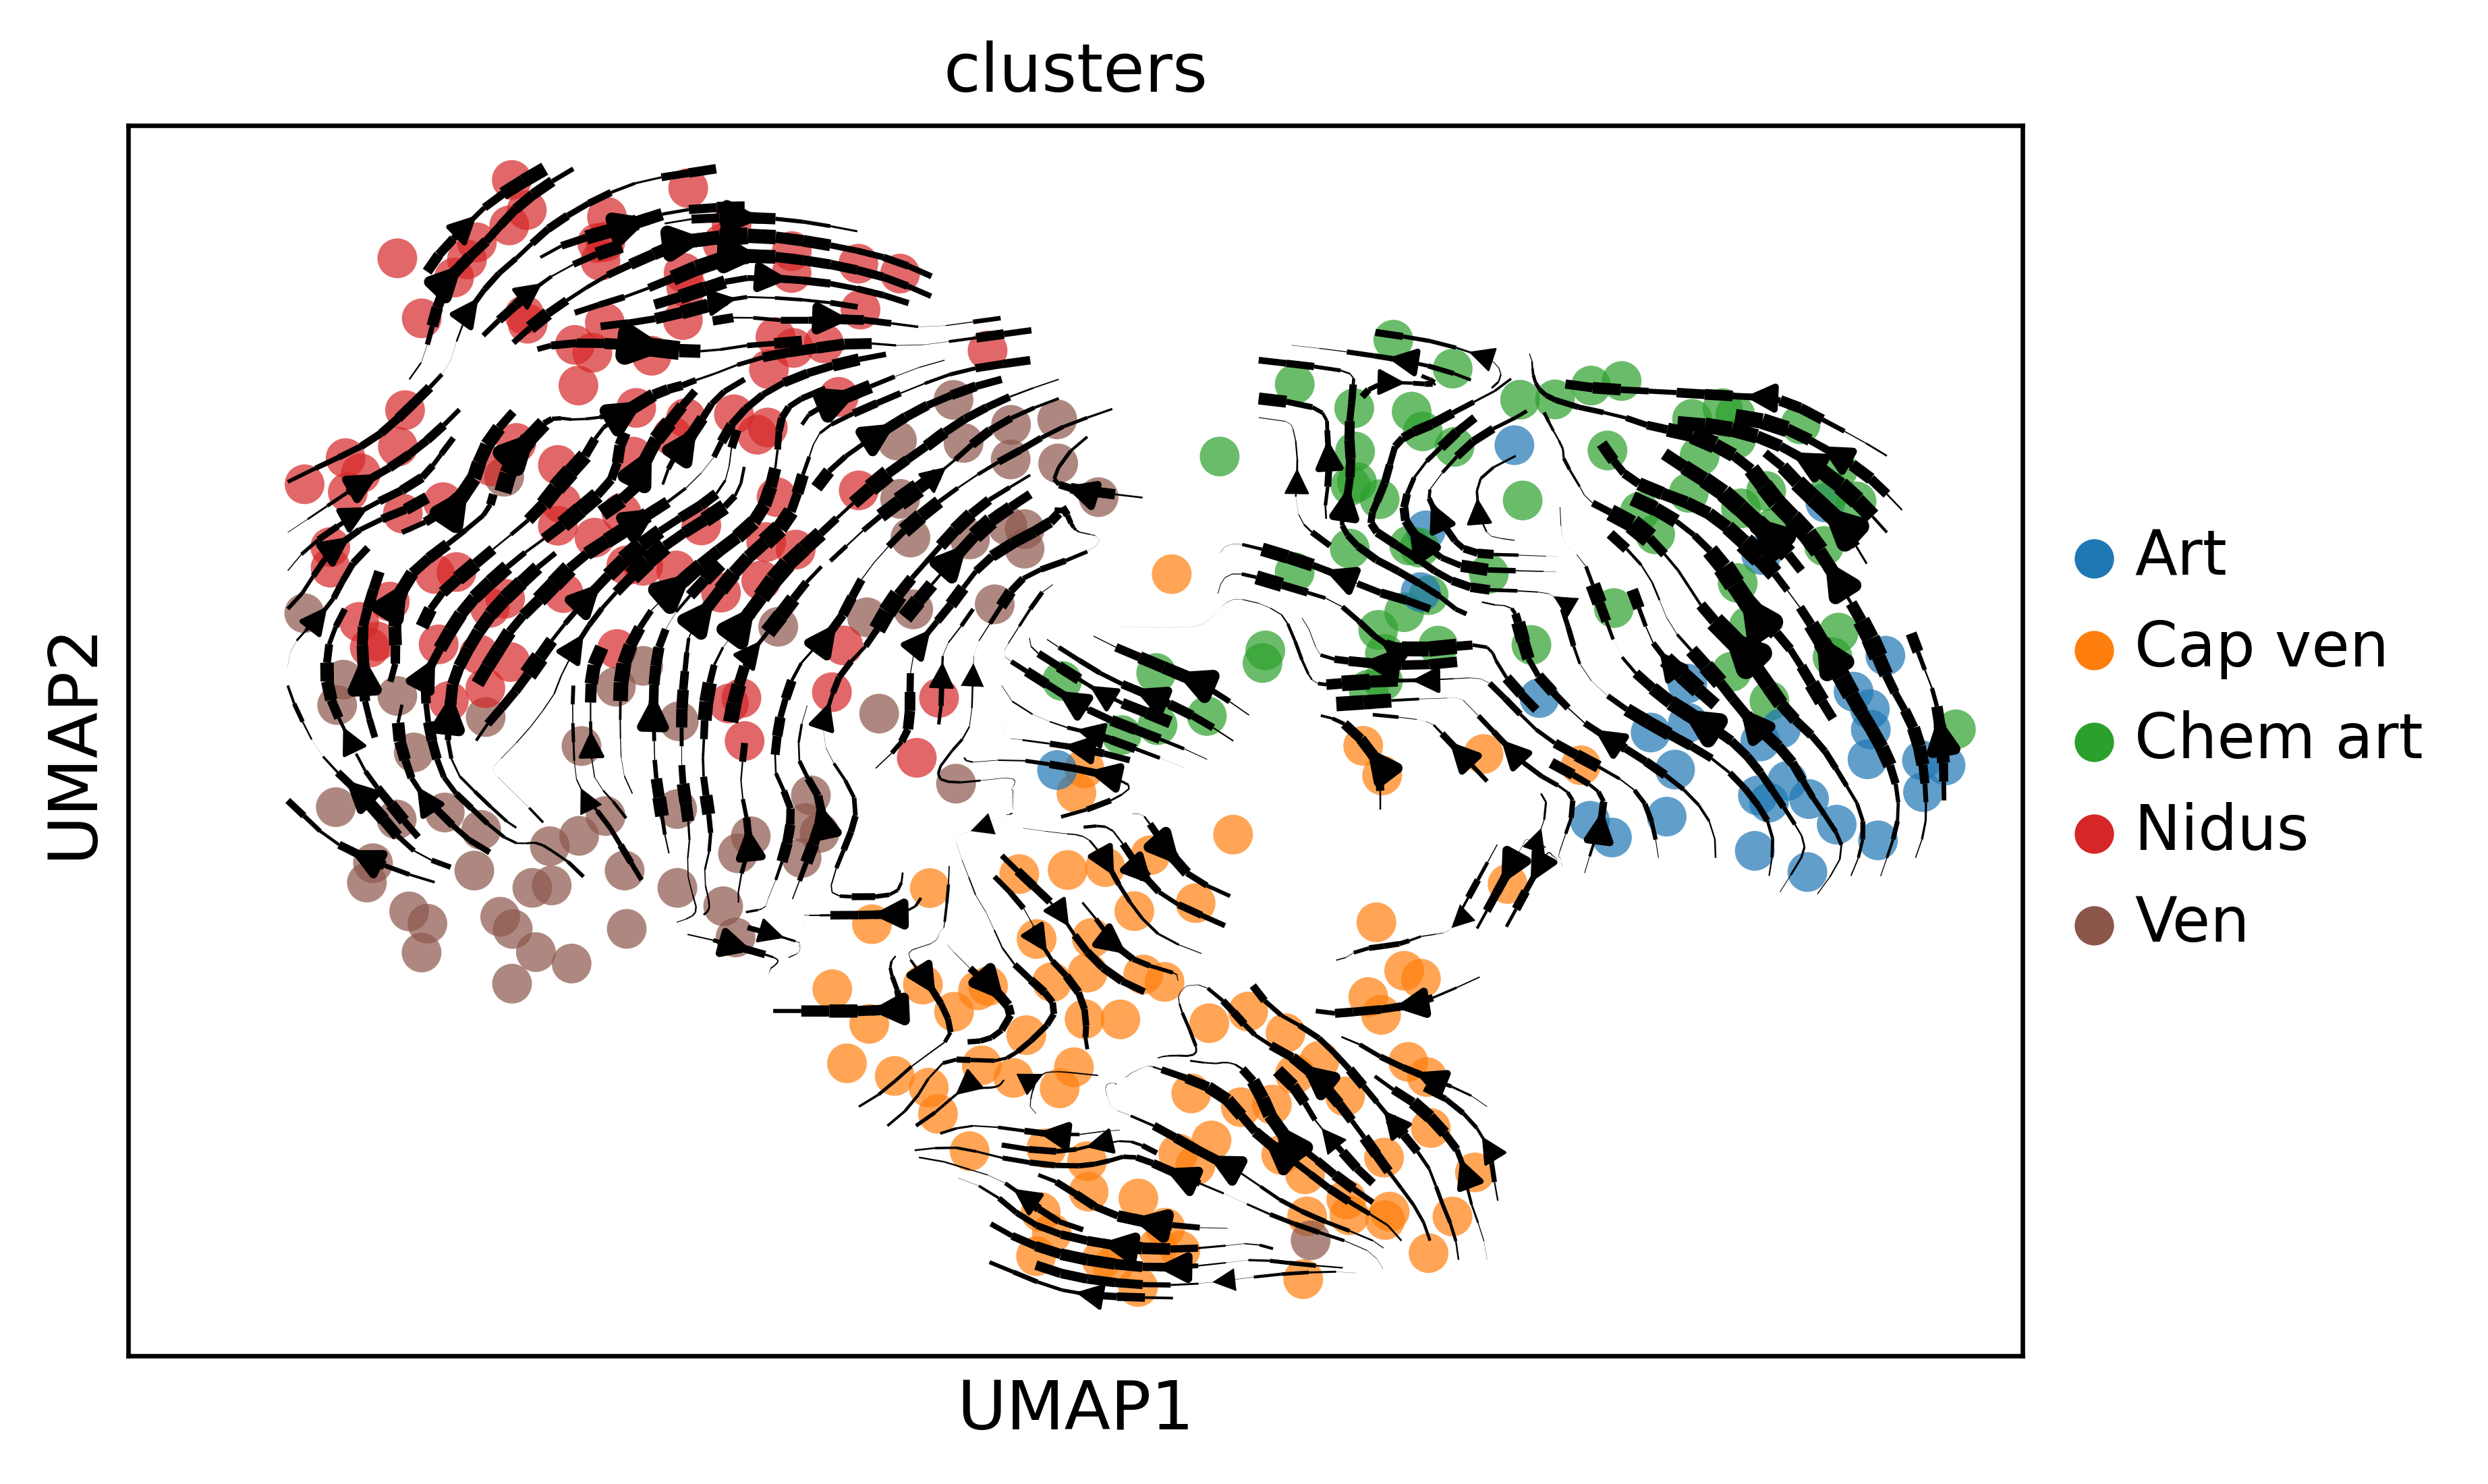

In [145]:
scv.pl.velocity_embedding_stream(adata_new, basis='umap', legend_loc='right margin', dpi=300, linewidth=2, alpha=.7, size=200,frameon=True, xlim=(-2,12), ylim=(-1,12))

computing latent time using root_cells as prior
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


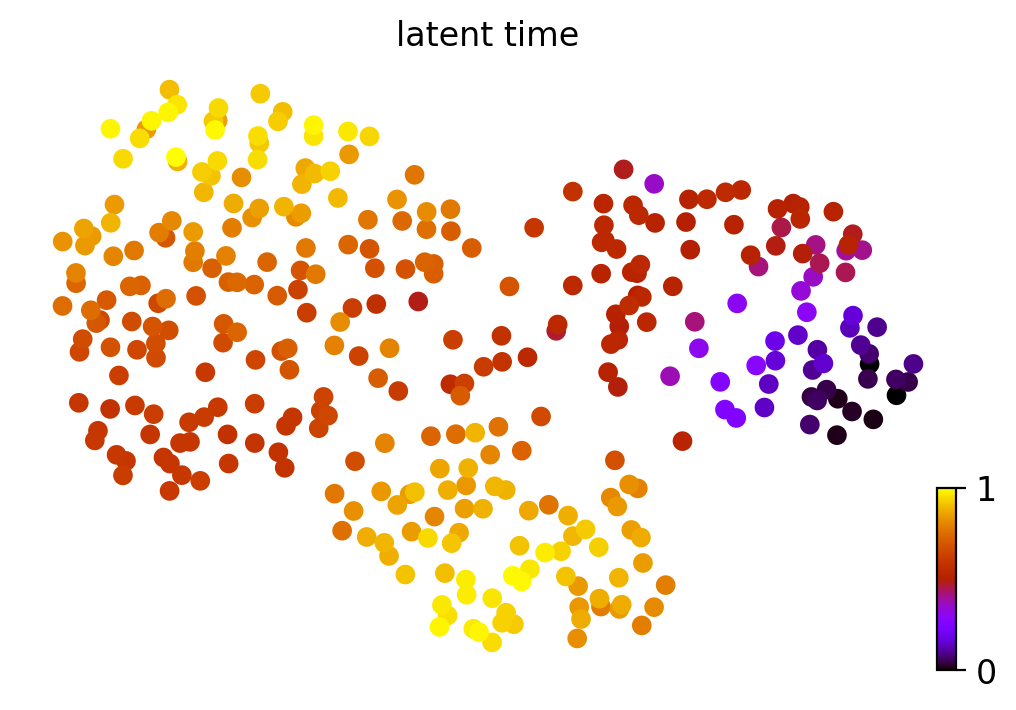

In [146]:
scv.tl.latent_time(adata_new)
scv.pl.scatter(adata_new, color='latent_time', color_map='gnuplot', size=200)

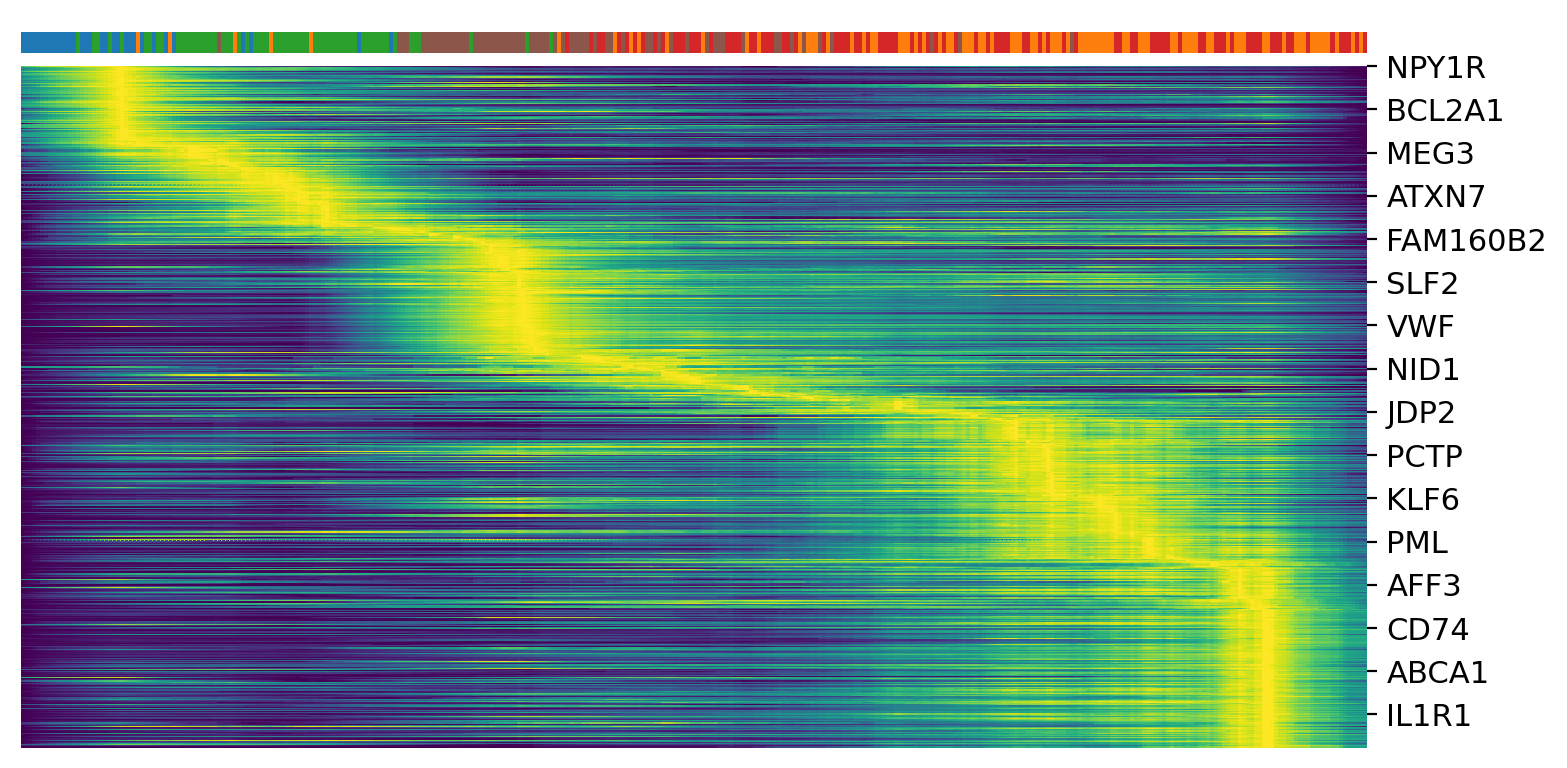

In [164]:
top_genes = adata_new.var['fit_likelihood'].sort_values(ascending=False).index[:600]
scv.pl.heatmap(adata_new, var_names=top_genes, tkey='latent_time', n_convolve=50, col_color='clusters')

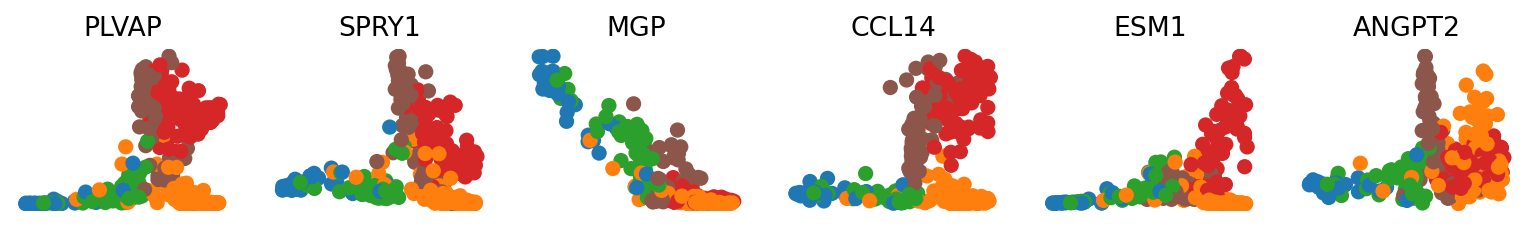

In [174]:
#top_genes
scv.pl.scatter(adata_new, x='latent_time', y=['PLVAP','SPRY1','MGP',"CCL14","ESM1","ANGPT2"],color='clusters',frameon=False)

In [155]:
import pandas as pd
pd.DataFrame(adata_new.obsm['X_umap']).to_csv('/media/chang/HDD-2/chang/avm_velo_umap.csv', index_label=False)
pd.DataFrame(adata_new.obs_names).to_csv('/media/chang/HDD-2/chang/avm_velo_cells.csv', index_label=False)